# Анализ данных в задаче кредитного скоринга

### Review criteria
1. Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.
2. При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
3. При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.

### Задание

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки; b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?
2. Пол (SEX). Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия).
3. Образование (EDUCATION). Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?
4. Семейное положение (MARRIAGE). Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.
5. Возраст (AGE). Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей; b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5 = прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ..., PAY_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1 = задержка в один месяц, 2 = задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, ..., BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

In [0]:
from __future__ import division

import numpy as np
import pandas as pd
import scipy

from scipy import stats
from statsmodels.stats import weightstats as wsm
from statsmodels.stats.proportion import proportion_confint

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
credit_story = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_13/datasets/credit_card_default_analysis.csv')

In [3]:
credit_story.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
credit_story.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1. Размер кредитного лимита (LIMIT_BAL).

В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки; b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

In [0]:
returned_limit_bal = credit_story.LIMIT_BAL.loc[credit_story.default == 0]
not_returned_limit_bal = credit_story.LIMIT_BAL.loc[credit_story.default == 1]

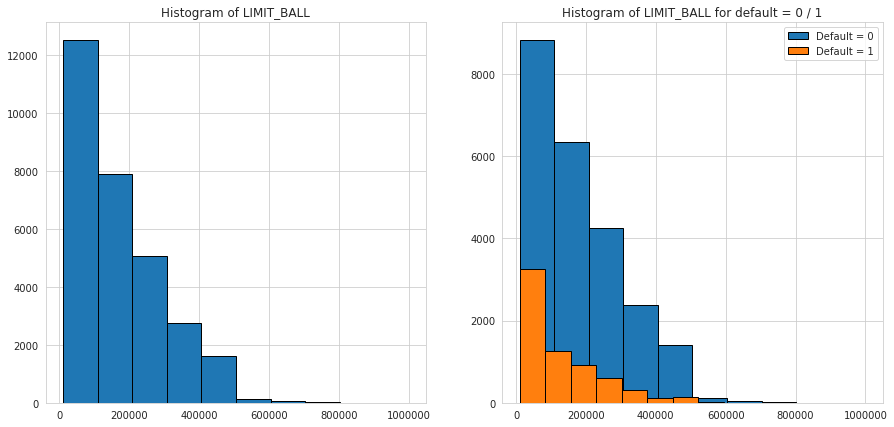

In [6]:
#histogram of LIMIT_BAL distribution
_ = plt.figure(1, figsize=(15,7))

_ = plt.subplot(121)
_ = plt.title('Histogram of LIMIT_BALL')
_ = plt.hist(credit_story['LIMIT_BAL'], edgecolor='k')

_ = plt.subplot(122)
_ = plt.title('Histogram of LIMIT_BALL for default = 0 / 1')
_ = plt.hist(returned_limit_bal, edgecolor='k', label='Default = 0')
_ = plt.hist(not_returned_limit_bal, edgecolor='k', label='Default = 1')
_ = plt.legend()

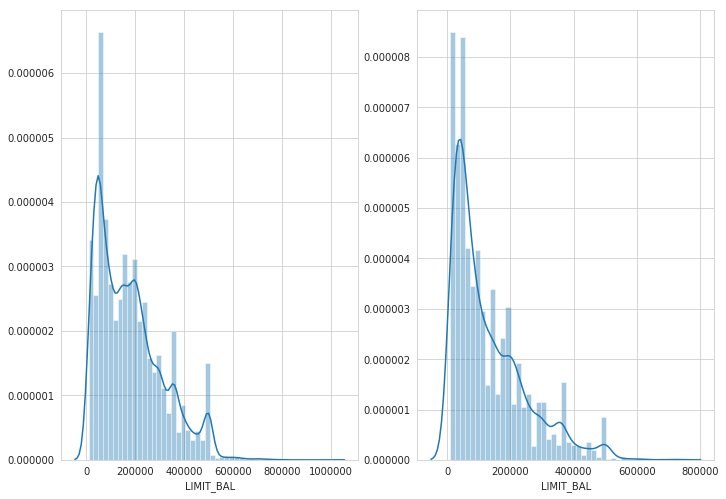

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(11.7, 8.27))
sns.distplot(returned_limit_bal, ax=axs[0])
sns.distplot(not_returned_limit_bal, ax=axs[1])

Доля небольших невозвратных кредитов заметно выше. Большие суммы люди стремятся возвращать. Распределение фишера?

#### Проверим гипотезу о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки.

* H0: медианные значения равны
* H1: медианные значения отличаются

In [8]:
lim_bal_0 = returned_limit_bal.values
lim_bal_1 = not_returned_limit_bal.values

print('Median LIMIT_BAL for default = 0: %.0f' % np.median(lim_bal_0))
print('Median LIMIT_BAL for default = 1: %.0f' % np.median(lim_bal_1))

Median LIMIT_BAL for default = 0: 150000
Median LIMIT_BAL for default = 1: 90000


#### Биномиальное распределение (точный способ)

In [0]:
def zconfint_binom(n, p, alpha=0.05):
    q = 1 - p
    m = n * p
    var = n * p * q
    z_stat = stats.norm.ppf(1 - alpha / 2)
    l_bound = int(round(m - z_stat * np.sqrt(var)))
    u_bound = int(round(m + z_stat * np.sqrt(var)))
    return (l_bound, u_bound)

In [10]:
lim_bal_0_s = np.sort(returned_limit_bal.values)
lim_bal_1_s = np.sort(not_returned_limit_bal.values)

l_ind_0, u_ind_0 = zconfint_binom(len(lim_bal_0_s), 0.5)
l_ind_1, u_ind_1 = zconfint_binom(len(lim_bal_1_s), 0.5)

print('Conf. int. median LIMIT_BAL for default = 0: [%d, %d]' % (lim_bal_0_s[l_ind_0], lim_bal_0_s[u_ind_0]))
print('Conf. int. median LIMIT_BAL for default = 1: [%d, %d]' % (lim_bal_1_s[l_ind_1], lim_bal_1_s[u_ind_1]))

Conf. int. median LIMIT_BAL for default = 0: [150000, 150000]
Conf. int. median LIMIT_BAL for default = 1: [80000, 90000]


#### Бутстрэп (приближённый способ)

In [0]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [0]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [13]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(returned_limit_bal.values, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(not_returned_limit_bal.values, 1000)))

print ("95% confidence interval for Returned limit bal:",  stat_intervals(ilec_median_scores, 0.05))
print ("95% confidence interval for Not returned limit bal:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for Returned limit bal: [150000. 150000.]
95% confidence interval for Not returned limit bal: [80000. 90000.]


Как видно из интервальной оценки, медианы не совпадают. Заёмщики, которые не возвращают кредит, обычно берут меньшую сумму.

#### Проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Для проверки гипотезы подойдёт перестановочный критерий для независимых выборок.

* H0: распределения выборок полностью равны
* H1: распределения выборок отличаются на величину сдвига

In [0]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [0]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [0]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [0]:
def permutation_test(sample1, sample2, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [18]:
print('p-value: %f' % permutation_test(lim_bal_0, lim_bal_1, max_permutations=1000))

p-value: 0.001000


P-value получается довольно маленьким и нулевая гипотеза отвергается на уровне значимости 0.05.

Результат является практически значимым, потому что разница в значениях медианы LIMIT_BAL значимо большая.

<b>

### 2. Пол (SEX).

SEX: пол клиента (1 = мужской, 2 = женский )

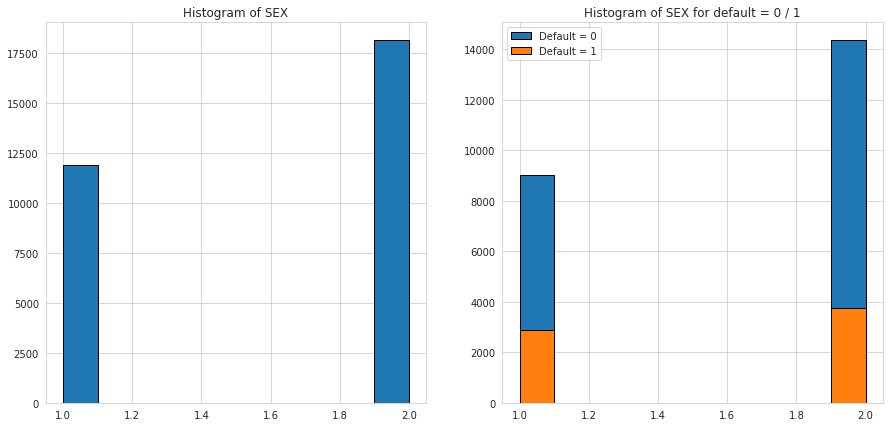

In [19]:
#histogram of SEX distribution
_ = plt.figure(1, figsize=(15,7))

_ = plt.subplot(121)
_ = plt.title('Histogram of SEX')
_ = plt.hist(credit_story['SEX'], edgecolor='k')

_ = plt.subplot(122)
_ = plt.title('Histogram of SEX for default = 0 / 1')
_ = plt.hist(credit_story.SEX.loc[credit_story.default == 0], edgecolor='k', label='Default = 0')
_ = plt.hist(credit_story.SEX.loc[credit_story.default == 1], edgecolor='k', label='Default = 1')
_ = plt.legend()

Женщины более склонны к невозврату кредита, чем мужчины.

#### Проверим гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается.

2. Пол (SEX). Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия).

In [20]:
MALE = 1
FEMALE = 2

returned_group_sex = credit_story.SEX.loc[credit_story.default == 0].values
not_returned_group_sex = credit_story.SEX.loc[credit_story.default == 1].values

#proportions of men to women in samples
men_to_woman_proportion_in_returned_group = np.where(returned_group_sex == MALE)[0].shape[0] / returned_group_sex.shape[0]
men_to_woman_proportion_in_not_returned_group = np.where(not_returned_group_sex == MALE)[0].shape[0] / not_returned_group_sex.shape[0]

print('Prop. of m to w in returned = 0: %.4f' % men_to_woman_proportion_in_returned_group)
print('Prop. of m to w in not_returned = 1: %.4f' % men_to_woman_proportion_in_not_returned_group)

Prop. of m to w in returned = 0: 0.3859
Prop. of m to w in not_returned = 1: 0.4329


Процент мужчин больше в выборке не вернувших кредит

In [21]:
conf_int_0 = proportion_confint(np.count_nonzero(returned_group_sex == 1), returned_group_sex.shape[0])
conf_int_1 = proportion_confint(np.count_nonzero(not_returned_group_sex == 1), not_returned_group_sex.shape[0])

print('Conf. int. for prop. of men or default = 0: [%.4f, %.4f]' % conf_int_0)
print('Conf. int. for prop. of men or default = 1: [%.4f, %.4f]' % conf_int_1)

Conf. int. for prop. of men or default = 0: [0.3796, 0.3921]
Conf. int. for prop. of men or default = 1: [0.4210, 0.4449]


ак видно из интервальных оценок, сами интервалы не пересекаются, следовательно гендерный состав различается.

Построим доверительный интервал для разности двух долей независимых выборок.

In [0]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [23]:
print (f"95%% confidence interval for a difference between proportions: {proportions_diff_confint_ind(returned_group_sex-1, not_returned_group_sex-1)}")

95%% confidence interval for a difference between proportions: (0.03363493274962867, 0.060548077974896725)


Гипотеза подтверждается

#### Используем статистический Z-критерий для доли для двух независимых выборок.

* H0: гендерный состав не отличается
* H1: гендерный состав отличается

In [0]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [0]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [26]:
print (f"p-value: {proportions_diff_z_test(proportions_diff_z_stat_ind(returned_group_sex-1, not_returned_group_sex-1))}")

p-value: 4.472866521609831e-12


Гипотеза о равенстве гендерного распределния отвергается. 

In [27]:
print (f"p-value: {proportions_diff_z_test(proportions_diff_z_stat_ind(returned_group_sex-1, not_returned_group_sex-1), 'greater')}")

p-value: 2.2364332608049153e-12


Мы можем утверждать, что в числе не вернувших кредит процент мужчин в генеерном составе больше

### 3. Образование (EDUCATION).


Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек.


EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5 = прочее; 6 = нет данных)

### Some constants

In [0]:
DOCTOR = 0
MASTER = 1
BACHELOR = 2
GRADUATE = 3
PRIMARY = 4
OTHER = 5
NO_DATA = 6

edu_types = [DOCTOR, MASTER, BACHELOR, GRADUATE, PRIMARY, OTHER, NO_DATA]

returned_edu = credit_story.EDUCATION.loc[credit_story.default == 0]
not_returned_edu = credit_story.EDUCATION.loc[credit_story.default == 1]

edu_types_total_count = np.array([
    credit_story[credit_story.EDUCATION==edu_type].shape[0]
    for edu_type in edu_types])

edu_types_returned_count = np.array([
    returned_edu[returned_edu==edu_type].count() 
    for edu_type in edu_types])

edu_types_not_returned_count = np.array([
    not_returned_edu[not_returned_edu==edu_type].count() 
    for edu_type in edu_types])

### Vizualization

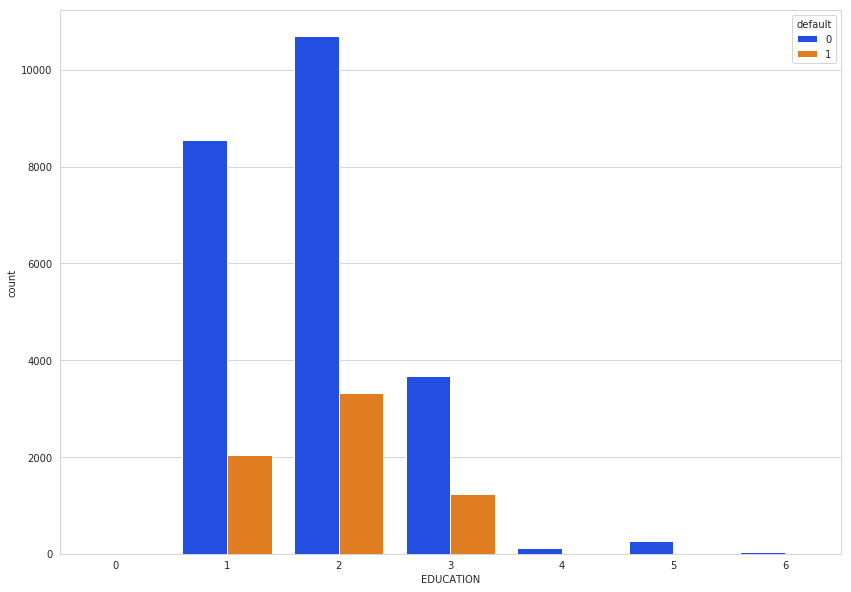

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.countplot(x='EDUCATION',hue='default',ax=ax,data=credit_story,palette='bright' )

В основном берут кредиты люди с BS и MS. Принципиальная разница между распределниями тех, кто вернул, и тех, кто нет, не наблюдается. 



#### Проверим гипотезу о том, что образование не влияет на то, вернет ли человек долг.

Построим график долей


In [0]:
edu_type_returned_proportion = [
    edu_types_returned_count[i] / edu_types_total_count[i]
    for i in range(0,len(edu_types))
]

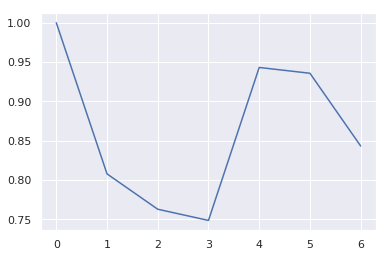

In [31]:
sns.set(style='darkgrid')
sns.lineplot(x=edu_types, y=edu_type_returned_proportion)

### Произведём строгую проверку на соответствие данного распределения равномерному с помощью критерия согласия Пирсона хи-квадрат.

* H0: рассматривая величина имеет равномерное распределение
* H1: H0 не верна

Посчитаем среднее значение доли возврата кредитов среди различных уровней образования. Будем использовать эту оценку для построения ожидаемого равномерного распределения.

In [32]:
edu_type_returned_proportion_mean = np.array(edu_type_returned_proportion).mean()
print('Mean proportion value: %.2f' % edu_type_returned_proportion_mean)

Mean proportion value: 0.86


In [0]:
confusion_table = pd.DataFrame(
    index=range(0,len(edu_types)),
    columns=['Returned number', 'Not returned number', 'Total number'],
    data=[[edu_types_returned_count[i], edu_types_not_returned_count[i], edu_types_total_count[i]] for i in range(0,len(edu_types))])

In [34]:
confusion_table

,Returned number,Not returned number,Total number
0,14,0,14
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,116,7,123
5,262,18,280
6,43,8,51


Составим таблицу сопряжённости "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек.

In [0]:
confusion_table['Expected returned number'] = (confusion_table['Total number'] * edu_type_returned_proportion_mean).astype(int)
confusion_table['Expected-real returned number error'] = confusion_table['Returned number'] - confusion_table['Expected returned number']

In [36]:
confusion_table

,Returned number,Not returned number,Total number,Expected returned number,Expected-real returned number error
0,14,0,14,12,2
1,8549,2036,10585,9134,-585
2,10700,3330,14030,12107,-1407
3,3680,1237,4917,4243,-563
4,116,7,123,106,10
5,262,18,280,241,21
6,43,8,51,44,-1


In [0]:
confusion_table['Expected-real returned number scaled error'] = confusion_table['Expected-real returned number error']/confusion_table['Total number']

In [38]:
confusion_table

,Returned number,Not returned number,Total number,Expected returned number,Expected-real returned number error,Expected-real returned number scaled error
0,14,0,14,12,2,0.142857
1,8549,2036,10585,9134,-585,-0.055267
2,10700,3330,14030,12107,-1407,-0.100285
3,3680,1237,4917,4243,-563,-0.114501
4,116,7,123,106,10,0.081301
5,262,18,280,241,21,0.075000
6,43,8,51,44,-1,-0.019608


Гипотеза о том, что величина имеет равномерное распределение отвергается с очень высокой долей вероятности.

In [39]:
stats.chisquare(confusion_table['Returned number'], confusion_table['Expected returned number'], ddof = 1)

Power_divergenceResult(statistic=278.81323227661096, pvalue=3.5803812280614125e-58)

Результат имеет практическую значимость для выдачи кредита, доли возврата значимо отличаются для разных уровней образования.

### 4. Семейное положение (MARRIAGE).

Семейное положение (MARRIAGE). Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

### Constants

In [0]:
NO_ANSWER = 0
MARRIED = 1
NOT_MARRIED = 2
NO_DATA = 3

marriage_types = [NO_ANSWER, MARRIED, NOT_MARRIED, NO_DATA]

returned_marriage = credit_story.MARRIAGE.loc[credit_story.default == 0]
not_returned_marriage = credit_story.MARRIAGE.loc[credit_story.default == 1]

marriage_types_total_count = np.array([
    credit_story[credit_story.MARRIAGE==marriage_type].shape[0]
    for marriage_type in marriage_types])

marriage_types_returned_count = np.array([
    returned_marriage[returned_marriage==marriage_type].count() 
    for marriage_type in marriage_types])

marriage_types_not_returned_count = np.array([
    not_returned_marriage[not_returned_marriage==marriage_type].count() 
    for marriage_type in marriage_types])

### Vizualization

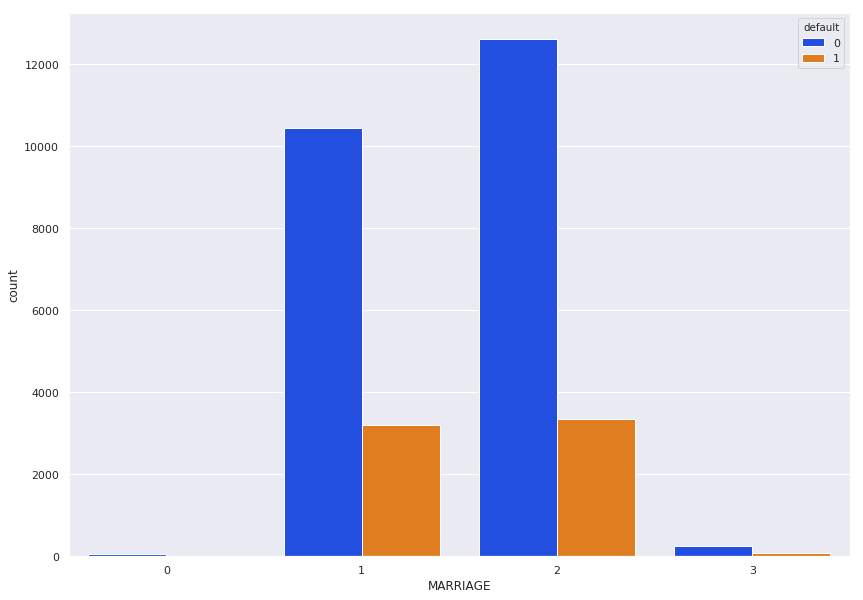

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.countplot(x='MARRIAGE',hue='default',ax=ax,data=credit_story,palette='bright' )

In [0]:
marriage_types_returned_proportion = [
    marriage_types_returned_count[i] / marriage_types_total_count[i]
    for i in range(0,len(marriage_types))
]

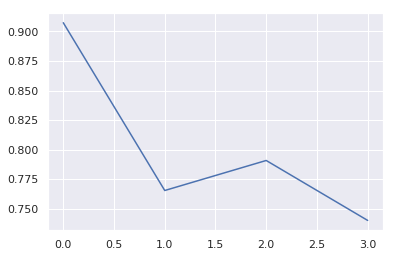

In [43]:
sns.set(style='darkgrid')
sns.lineplot(x=marriage_types, y=marriage_types_returned_proportion)

In [44]:
print(marriage_types_total_count)

[   54 13659 15964   323]


In [46]:
marriage_types_returned_proportion

[0.9074074074074074, 0.7652829636137345, 0.7907166123778502, 0.739938080495356]

In [0]:
del marriage_types_returned_proportion[0]

In [0]:
del marriage_types[0]

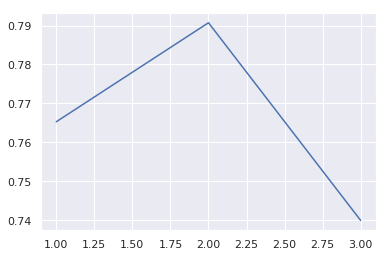

In [49]:
sns.set(style='darkgrid')
sns.lineplot(x=marriage_types, y=marriage_types_returned_proportion)

Доли невозвратов среди женатых и холостых людей различается примерно на 10%.

#### Проверим, как связан семейный статус с индикатором дефолта.

Вычислим коэффициент V Крамера.

In [50]:
mar = credit_story.MARRIAGE
mar_0 = credit_story.MARRIAGE.loc[credit_story.default == 0]
mar_1 = credit_story.MARRIAGE.loc[credit_story.default == 1]

print('Value counts for marriage:')
mar.value_counts()

Value counts for marriage:


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [51]:
conf_table = np.empty( (len(mar.value_counts()), 2) )
for i in range(len(mar.value_counts())):
    conf_table[i, 0] = len(mar_0.loc[mar_0 == i])
    conf_table[i, 1] = len(mar_1.loc[mar_1 == i])
conf_table

array([[4.9000e+01, 5.0000e+00],
       [1.0453e+04, 3.2060e+03],
       [1.2623e+04, 3.3410e+03],
       [2.3900e+02, 8.4000e+01]])

In [0]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [53]:
print('V Cramer stat value: %.4f' % cramers_stat(conf_table))

V Cramer stat value: 0.0345


Коэффициент Крамера принимает значение, близкое к нулю, когда взаимосвязь отсутствует.

Практическая значимость в данном результате также присутствует, т.к. исходя из этих данных нет разницы в том, с каким статусом MARRIAGE приходит человек за кредитом.

### 5. Возраст (AGE).

Молодые люди склонные не возвращать кредиты. Доля тех, кто взял кредит в 20 лет и вернул его, меньше доли оных, которые не вернули кредит.

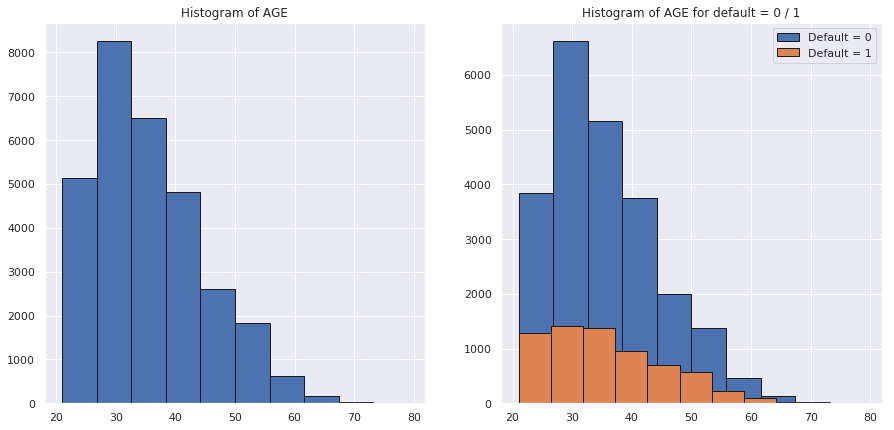

In [54]:
#histogram of AGE distribution
_ = plt.figure(1, figsize=(15,7))

_ = plt.subplot(121)
_ = plt.title('Histogram of AGE')
_ = plt.hist(credit_story['AGE'], edgecolor='k')

_ = plt.subplot(122)
_ = plt.title('Histogram of AGE for default = 0 / 1')
_ = plt.hist(credit_story.AGE.loc[credit_story.default == 0], edgecolor='k', label='Default = 0')
_ = plt.hist(credit_story.AGE.loc[credit_story.default == 1], edgecolor='k', label='Default = 1')
_ = plt.legend()

#### Проверим гипотезу о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки.

* H0: медианные значения равны
* H1: медианные значения отличаются

In [55]:
#samples of AGE for default = 0/1
age_0 = credit_story.AGE.loc[credit_story.default == 0]
age_1 = credit_story.AGE.loc[credit_story.default == 1]

print('Median AGE for default = 0: %.0f' % age_0.median())
print('Median AGE for default = 1: %.0f' % age_1.median())

Median AGE for default = 0: 34
Median AGE for default = 1: 34


#### Доверительный интервал для медианы на основе бутстрепа.

In [56]:
#confidence intervals estimation
np.random.seed(0)

age_0_bs_med = list(map(np.median, get_bootstrap_samples(age_0.values, 100)))
age_1_bs_med = list(map(np.median, get_bootstrap_samples(age_1.values, 100)))

bnd_0 = stat_intervals(age_0_bs_med, 0.05)
bnd_1 = stat_intervals(age_1_bs_med, 0.05)

print('Conf. int. median AGE for default = 0: [%f, %f]' % (bnd_0[0], bnd_0[1]))
print('Conf. int. median AGE for default = 1: [%f, %f]' % (bnd_1[0], bnd_1[1]))

Conf. int. median AGE for default = 0: [34.000000, 34.000000]
Conf. int. median AGE for default = 1: [34.000000, 35.000000]


Как видно из интервальной оценки, интервальные оценки для медианы пересекаются.

#### Построим интервальную оценку для разности медиан.

In [57]:
print('Difference between medians: %f' % (np.median(age_0) - np.median(age_1)))

Difference between medians: 0.000000


In [0]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(age_0_bs_med, age_1_bs_med)))

In [59]:
stat_int = stat_intervals(delta_median_scores, 0.05)
print('95%% conf. int. for the difference between medians: [%f, %f]' % (stat_int[0], stat_int[1]))

95% conf. int. for the difference between medians: [0.000000, 1.000000]


Поскольку доверительный интервал содержит ноль, значения медиан не различаются.

#### Проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Для проверки гипотезы подойдёт перестановочный критерий для независимых выборок.

* H0: распределения выборок полностью равны
* H1: распределения выборок отличаются на величину сдвига

In [60]:
print('p-value: %f' % permutation_test(age_0, age_1, max_permutations=1000))

p-value: 0.014000


P-value получается довольно маленьким и нулевая гипотеза отвергается на уровне значимости 0.05.

Результат является практически значимым, потому что разница в распределениях видна невооружённым взглядом и эти данные могут учитываться при выдаче кредита.